In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Data/Real-data/Real_Combine.csv")


In [3]:
df.head()

T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833

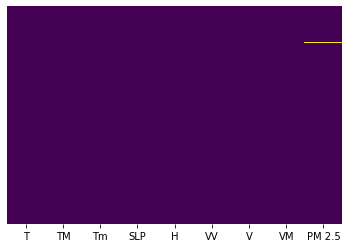

In [4]:
sns.heatmap(df.isnull(),yticklabels=False, cbar = False, cmap='viridis')


In [5]:
df.isnull().sum()


T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [6]:
df = df.dropna()


In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
X.isnull().sum()


T      0
TM     0
Tm     0
SLP    0
H      0
VV     0
V      0
VM     0
dtype: int64

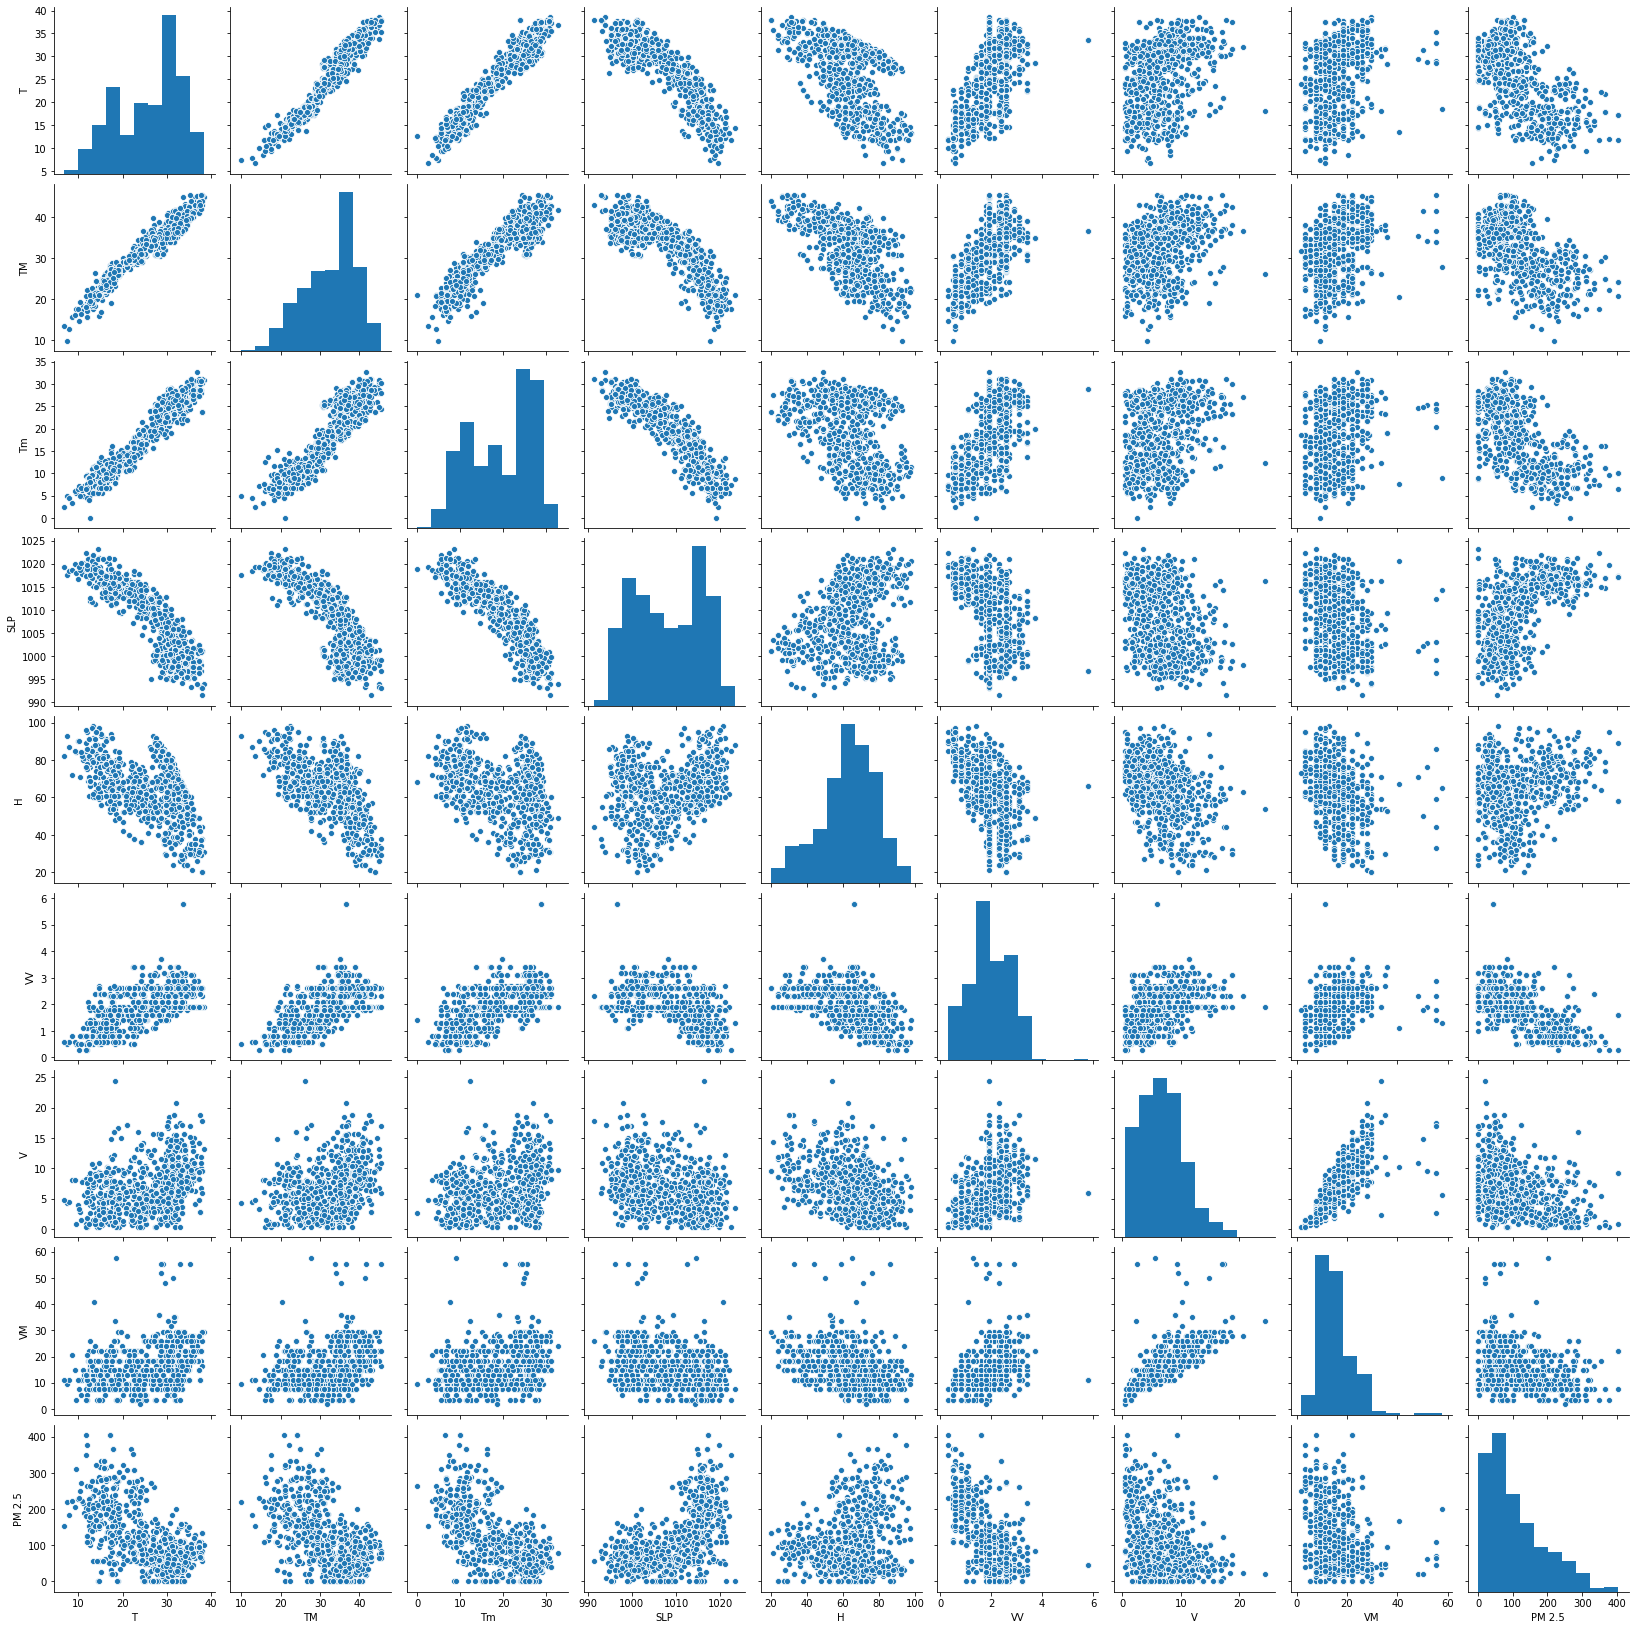

In [9]:
sns.pairplot(df)

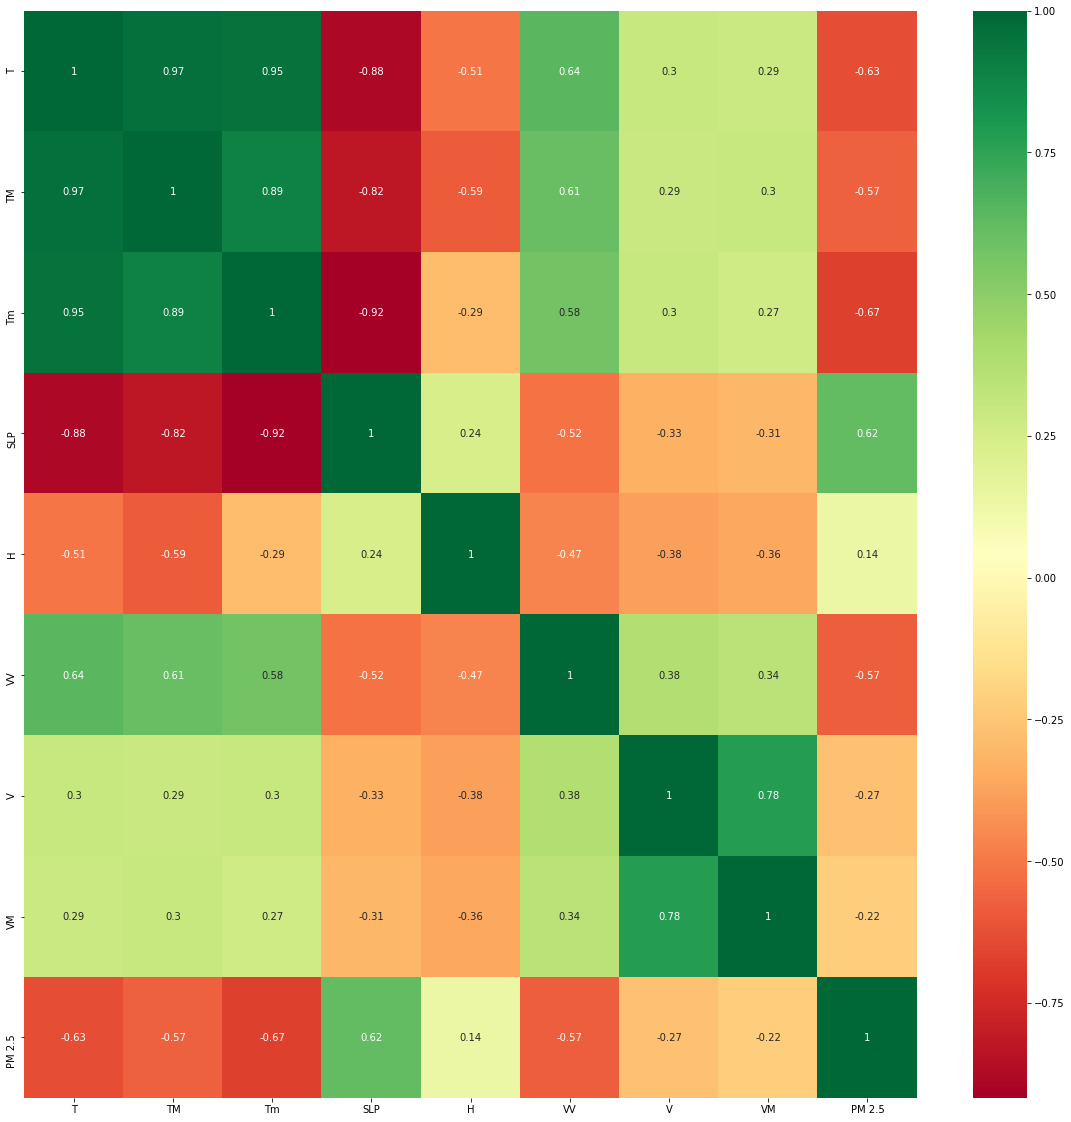

In [10]:
corrmat = df.corr()
top_corr_featuress = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_featuress].corr(), annot=True, cmap = "RdYlGn")

In [11]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [12]:
print(model.feature_importances_)

[0.17817322 0.12321396 0.17882528 0.14895072 0.08585027 0.18930333
 0.05142474 0.04425849]


In [13]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)


In [14]:
from sklearn.tree import DecisionTreeRegressor


In [15]:
dtree = DecisionTreeRegressor(criterion='mse')

In [16]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [17]:
print("R2 Score on train data is {}".format(dtree.score(X_train,y_train)))

R2 Score on train data is 1.0


In [18]:
print("R2 Score on test data is {}".format(dtree.score(X_test,y_test)))

R2 Score on test data is 0.7118375057769087


In [19]:
from sklearn.model_selection import cross_val_score


In [20]:
score = cross_val_score(dtree,X,y, cv = 5)

In [21]:
score.mean()

0.4512081528590011

In [22]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\Rajat\Anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [23]:
features = list(df.columns[:-1])
features

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

In [24]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [25]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.92985 to fit



In [26]:
prediction = dtree.predict(X_test)

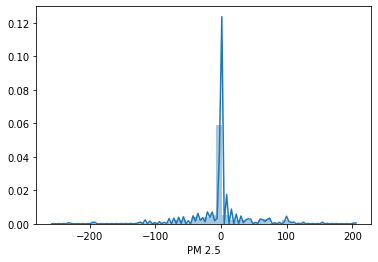

In [27]:
sns.distplot(y_test-prediction)

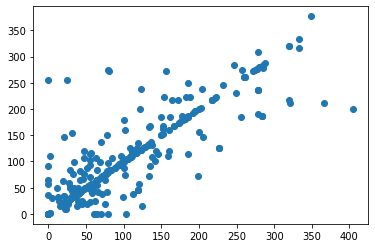

In [28]:
plt.scatter(y_test, prediction)

## Hyper Parameter Optimization

In [29]:
DecisionTreeRegressor()

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [30]:
params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [31]:
from sklearn.model_selection import GridSearchCV
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [32]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [33]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 6672 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 11280 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 16912 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 23568 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 31248 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 39952 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done 49680 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 60432 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 72208 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 85008 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 98832 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 102400


 Time taken: 0 hours 2 minutes and 46.56 seconds.


In [34]:
random_search.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': 40,
 'min_samples_leaf': 2,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [35]:
random_search.best_score_

-3131.6489619178874

In [36]:
predictions=random_search.predict(X_test)

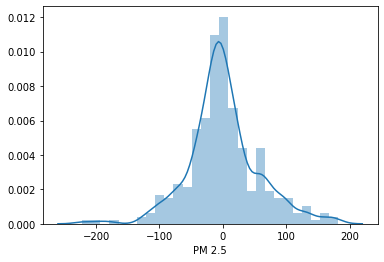

In [37]:
sns.distplot(y_test-predictions)

In [38]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 23.00053353658537
MSE: 2064.338876503218
RMSE: 45.43499616488614


In [39]:
import pickle 
# open a file, where you ant to store the data
file = open('decision_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_search, file)